<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Загрузка-и-предобработка-данных" data-toc-modified-id="Загрузка-и-предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка и предобработка данных</a></span></li><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Построение-моделей-машинного-обучения" data-toc-modified-id="Построение-моделей-машинного-обучения-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Построение моделей машинного обучения</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Случайный лес</a></span></li></ul></li><li><span><a href="#Кластеризация-клиентов" data-toc-modified-id="Кластеризация-клиентов-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Кластеризация клиентов</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Рекомендации" data-toc-modified-id="Рекомендации-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Рекомендации</a></span></li></ul></div>

# Прогноз оттока клиентов фитнес-центра

## Описание проекта

Сеть фитнес-центров поставила перед собой целью снизить количество клиентов, которые прекращают пользоваться ее услугами. Для этого с помощью методов машинного обучения необходимо определить наиболее вероятные параметры, при которых клиент с большой вероятностью уйдет в отток (churn). Кроме того, необходимо кластеризировать клиентов, что позволит применять к ним различные маркетинговые подходы.

Для исследования дан файл 'gym_churn.csv', который содержит следующую информацию:
- 'gender' — пол клиента;
- 'Near_Location' — расположен ли фитнес-центр рядом с местом жительства или работы клиента;
- 'Partner' — является ли клиент сотрудником компании-партнера фитнес-клуба;
- 'Promo_friends' — пришел ли клиент в клуб в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- 'Phone' — указал ли клиент контактный телефон;
- 'Age' — возраст;
- 'Lifetime' — время с момента первого посещения фитнес-центра (в месяцах);
- 'Contract_period' — длительность текущего абонемента (месяц, 6 месяцев, год);
- 'Month_to_end_contract' — срок до окончания текущего абонемента (в месяцах);
- 'Group_visits' — посещает ли клиент групповые занятия;
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон;
- 'Churn' — ушел ли клиент в отток в текущем месяце.

## Загрузка и предобработка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
try:
    df = pd.read_csv('C:/Users/Антон/datasets/gym_churn.csv')
except FileNotFoundError:
    df = pd.read_csv('/datasets/gym_churn.csv')

df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [3]:
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

Пропусков нет, типы данных установлены правильно.

In [4]:
df.duplicated().sum()

0

Дубликатов нет.

## Изучение данных

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


Ошибок в виде отрицательных значений нет, в остальном данные также в порядке.  

По общим данным видно, что в отток ушли 26,5% клиентов.

Изучим средние значения показателей в разбивке по тем, кто ушел, и тем, кто остался.

In [6]:
df.groupby('churn').mean().T

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


Построим гистограммы с распределением признаков по обеим группам.

In [7]:
df_churn = df[df['churn'] == 1].drop('churn', axis=1)
df_wo_churn = df[df['churn'] == 0].drop('churn', axis=1)

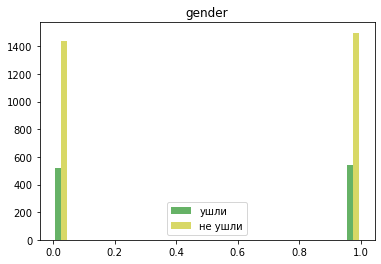

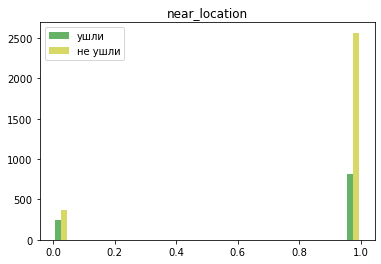

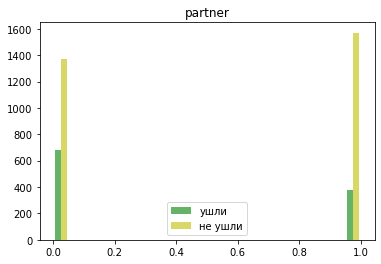

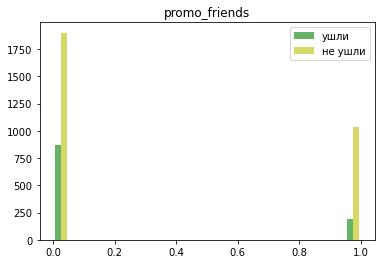

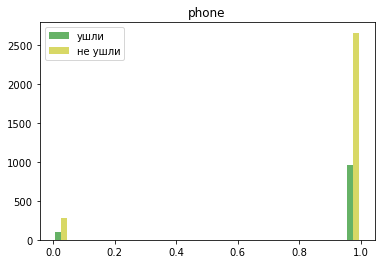

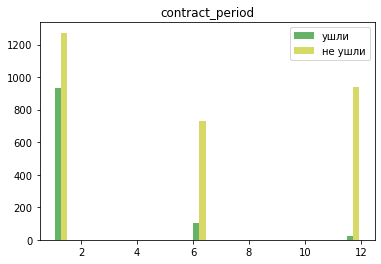

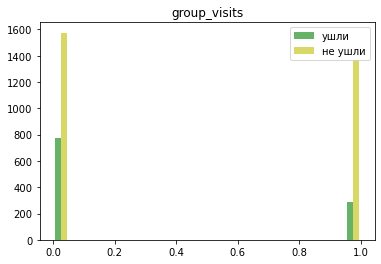

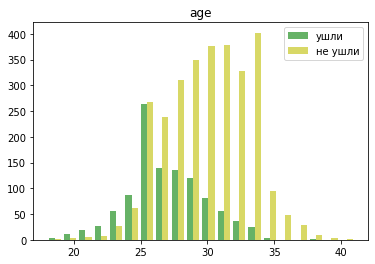

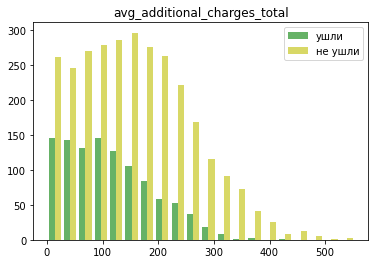

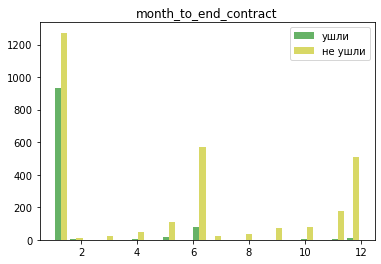

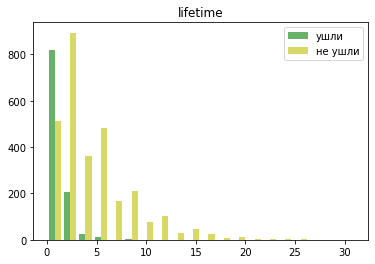

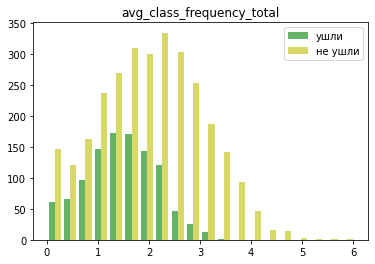

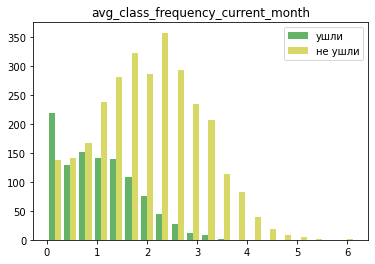

In [34]:
for column in df_churn.columns:
    plt.hist([df_churn[column], df_wo_churn[column]], color=['g','y'], alpha=0.6, bins=20,
             label=['ушли', 'не ушли'])
    plt.title(column)
    plt.legend()
    plt.show()

Из таблицы средних значений и диаграмм выше заметно, что среди тех, кто ушел в отток:
- меньше клиентов, для которых клуб находится недалеко от дома или работы;
- меньше клиентов от компаний-партнеров;
- меньше промо-клиентов;
- контракт заключен на меньший срок;
- меньше посещений групповых занятий;
- средний возраст немного ниже;
- меньше побочных трат;
- меньший срок пользования услугами фитнес-центра;
- меньше посещений.

Построим матрицу корреляций.

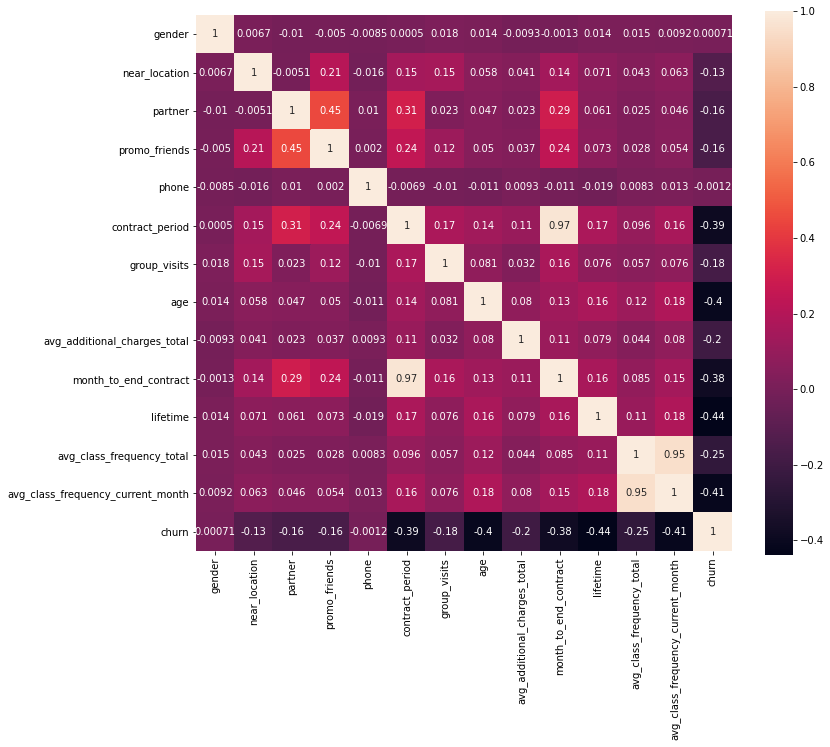

In [9]:
heatmap = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(heatmap, annot=True, square=True)
plt.show()

С целевой переменной ни один из других параметров сильно не коррелирует, но есть две пары параметров, которые коррелируют между собой: 'contract_period' / 'month_to_end_contract' и 'avg_class_frequency_total' / 'avg_class_frequency_current_month'.

Попытка избавиться от мультиколлинеарности (удалить по одному из этих параметров в каждой паре) не привела к повышению метрик, а наоборот — к понижению. Поэтому от этой идеи стоит отказаться.

In [41]:
df = df.drop(['contract_period', 'avg_class_frequency_total'], axis = 1)
df

,gender,near_location,partner,promo_friends,phone,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_current_month,churn
0,1,1,1,1,0,1,29,14.227470,5.0,3,0.000000,0
1,0,1,0,0,1,1,31,113.202938,12.0,7,1.910244,0
2,0,1,1,0,1,0,28,129.448479,1.0,2,1.736502,0
3,0,1,1,1,1,1,33,62.669863,12.0,2,3.357215,0
4,1,1,1,1,1,0,26,198.362265,1.0,3,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,0,33,2.406023,12.0,8,2.349070,0
3996,0,1,0,0,1,1,29,68.883764,1.0,1,0.292859,1
3997,1,1,1,1,1,0,28,78.250542,11.0,2,2.831439,0
3998,0,1,1,1,1,0,32,61.912657,5.0,3,1.596237,0


## Построение моделей машинного обучения

Разделим датафрейм на список параметров и целевую переменную, а затем поделим его на две выборки в пропорции 20/80: тренировочную и тестовую. Также укажем параметр stratify=y, т.к. распределение целевой переменной в нашем датафрейме неравномерное.

In [42]:
x = df.drop('churn', axis = 1)
y = df['churn']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

Стандартизируем данные.

In [43]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train_st = scaler.transform(x_train)
x_test_st = scaler.transform(x_test)

### Логистическая регрессия

Зададим модель логистической регрессии, обучим ее на тренировочной выборке и сделаем прогнозы по оттоку.

In [44]:
model = LogisticRegression(solver='liblinear', random_state=0)

model.fit(x_train_st, y_train)

predictions = model.predict(x_test_st)
probabilities = model.predict_proba(x_test_st)[:,1]

In [45]:
feature_importances = pd.DataFrame({'Признак': df.drop('churn', axis=1).columns, 'Важность': abs(model.coef_[0])})
feature_importances.sort_values(by='Важность', ascending=False)

,Признак,Важность
9,lifetime,3.554970
8,month_to_end_contract,1.367036
10,avg_class_frequency_current_month,1.281404
6,age,1.165476
7,avg_additional_charges_total,0.566779
5,group_visits,0.378394
3,promo_friends,0.140510
4,phone,0.074714
2,partner,0.067821
1,near_location,0.066397


Признаки, которые влияют на отток больше всего:
- время с момента первого обращения в фитнес-центр;
- остаток времени в месяцах до конца абонемента; 
- средняя частота посещений в неделю за последний месяц;
- возраст.

Найдем показатели метрик нашей модели.

In [57]:
print('Метрики модели логистической регрессии:')
print(f'Доля правильных ответов (accuracy) - {accuracy_score(y_test, predictions)}')
print(f'Точность (precision) - {precision_score(y_test, predictions)}')
print(f'Полнота (recall) - {recall_score(y_test, predictions)}')
print(f'F1-мера - {f1_score(y_test, predictions)}')

Метрики модели логистической регрессии:
Доля правильных ответов (accuracy) - 0.915
Точность (precision) - 0.839622641509434
Полнота (recall) - 0.839622641509434
F1-мера - 0.839622641509434


Так как в нашей выборке распределение целевого параметра (churn) неравномерно, целесообразно найти порог, при котором наиболее важная в нашем случае метрика (recall) будет показывать себя в лучшем виде. При этом F1-мера, которая отражает баланс метрик precision и recall, не должна сильно просесть.

In [55]:
threshold = 0.4

custom_predictions = [0 if i < threshold else 1 for i in probabilities]

In [56]:
print('Кастомизированные метрики логистической регрессии:')
print(f'Доля правильных ответов (accuracy) - {accuracy_score(y_test, custom_predictions)}')
print(f'Точность (precision) - {precision_score(y_test, custom_predictions)}')
print(f'Полнота (recall) - {recall_score(y_test, custom_predictions)}')
print(f'F1-мера - {f1_score(y_test, custom_predictions)}')

Кастомизированные метрики логистической регрессии:
Доля правильных ответов (accuracy) - 0.91875
Точность (precision) - 0.8127659574468085
Полнота (recall) - 0.9009433962264151
F1-мера - 0.8545861297539149


### Случайный лес

Зададим модель для дерева принятия решения, обучим ее на тренировочной выборке и сделаем прогнозы по оттоку.

In [61]:
tree_model = DecisionTreeClassifier(min_samples_leaf=200, random_state=0)
tree_model.fit(x_train_st, y_train)
tree_predictions = tree_model.predict(x_test_st)

In [62]:
print('Метрики для дерева принятия решения: ')
print(f'Доля правильных ответов (accuracy) - {accuracy_score(y_test, tree_predictions)}')
print(f'Точность (precision) - {precision_score(y_test, tree_predictions)}')
print(f'Полнота (recall) - {recall_score(y_test, tree_predictions)}')
print(f'F1-мера - {f1_score(y_test, tree_predictions)}')

Метрики для дерева принятия решения: 
Доля правильных ответов (accuracy) - 0.85875
Точность (precision) - 0.8193548387096774
Полнота (recall) - 0.5990566037735849
F1-мера - 0.6920980926430518


Судя по метрикам, модель случайного леса показывает себя намного хуже, чем логистическая регрессия.

In [63]:
tree_feature_importances = pd.DataFrame({'Признак': df.drop('churn', axis=1).columns, 'Важность': tree_model.feature_importances_})
tree_feature_importances.sort_values(by='Важность', ascending=False)

,Признак,Важность
9,lifetime,0.671924
8,month_to_end_contract,0.177155
10,avg_class_frequency_current_month,0.128026
6,age,0.022895
0,gender,0.000000
1,near_location,0.000000
2,partner,0.000000
3,promo_friends,0.000000
4,phone,0.000000
5,group_visits,0.000000


Признаки, которые влияют на отток больше всего:
- время с момента первого обращения в фитнес-центр;
- остаток времени в месяцах до конца абонемента; 
- средняя частота посещений в неделю за последний месяц;
- возраст.

## Кластеризация клиентов

Для выявления групп клиентов, объединенных схожими параметрами, необходимо провести их кластеризацию.

Стандартизируем данные и отобразим дендрограмму иерархической кластеризации.

In [64]:
sc = StandardScaler()
x_sc = sc.fit_transform(x)

links = linkage(x_sc, method = 'ward')

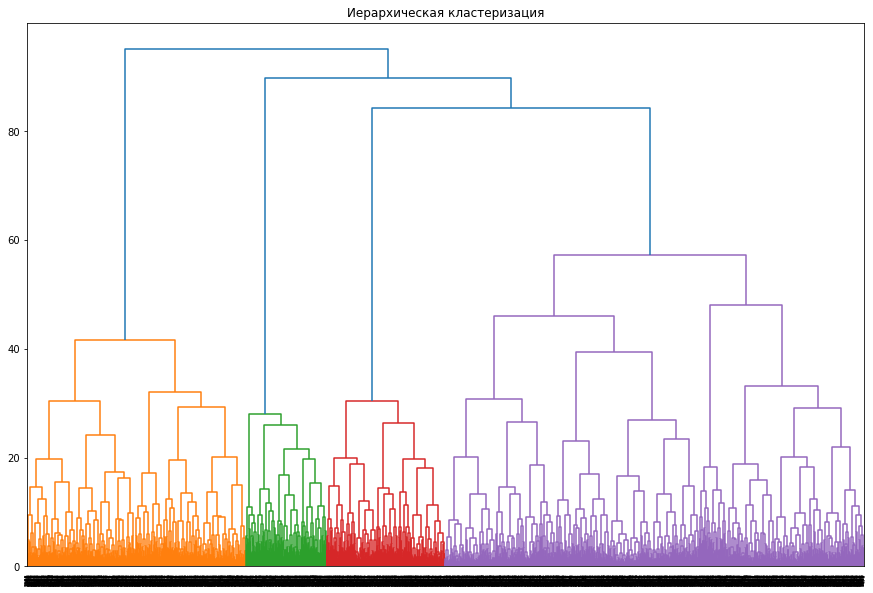

In [65]:
plt.figure(figsize=(15, 10))  
dendrogram(links, orientation='top')
plt.title('Иерархическая кластеризация')
plt.show()

Зададим число кластеров, равное 5, и применим алгоритм KMeans к данным.

In [66]:
km = KMeans(n_clusters=5, random_state=0)

clusters = km.fit_predict(x_sc)

Выведем средние значения признаков в разбивке по кластерам.

In [67]:
df['cluster'] = clusters

grouped = df.groupby('cluster').mean().sort_values(by='churn', ascending=False)
grouped['count'] = df.groupby('cluster')['cluster'].count()
grouped.T

cluster,2,3,0,4,1
gender,0.511194,0.502455,0.492000,0.550481,0.495352
near_location,1.000000,0.000000,0.994000,0.998798,0.998672
partner,0.226368,0.489362,0.953000,0.274038,0.378486
promo_friends,0.114428,0.072013,1.000000,0.075721,0.046481
phone,0.899254,0.913257,0.906000,0.897837,0.903054
group_visits,0.182836,0.232406,0.528000,1.000000,0.000000
age,26.807214,28.700491,29.633000,30.248798,30.342629
avg_additional_charges_total,111.073289,137.375245,154.086252,155.206260,174.392898
month_to_end_contract,1.715174,2.826514,6.730000,4.707933,4.698539
lifetime,1.420398,3.027823,4.287000,4.483173,5.166003


Заметно, что в кластере, где доля оттока наиболее высокая (2-й кластер, доля оттока — 74%):
- 804 клиента;
- средний возраст немного ниже, чем в других кластерах;
- наименьшая доля клиентов от компаний-партнеров;
- наименьший остаток срока действия абонемента;
- меньше в среднем побочных трат;
- наименьший срок пользования услугами фитнес-центра;
- наименьшее число посещений в среднем.

В кластере (1-й) с наименьшим оттоком (4,6%):
- 753 клиента;
- нет клиентов, посещающих групповые занятия;
- возраст самый высокий, хотя различия с другими кластерами не велико;
- самое высокое значение побочных трат в среднем;
- наибольший срок пользования услугами фитнес-центра;
- наибольшее число посещений в среднем.

Построим графики распределения признаков по кластерам.

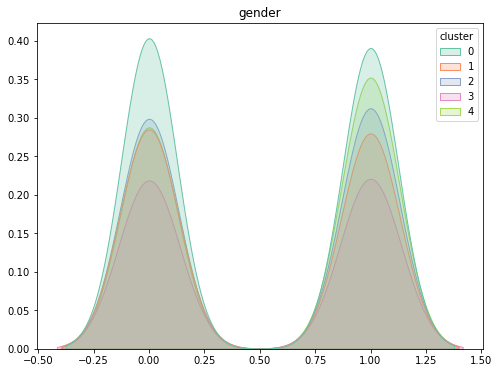

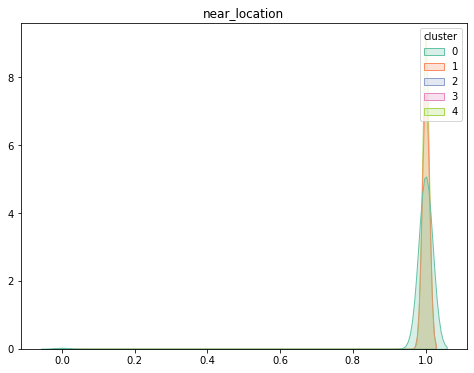

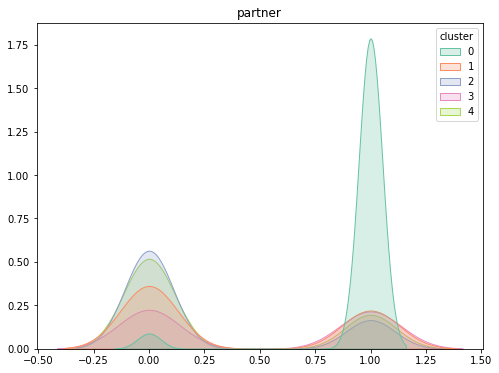

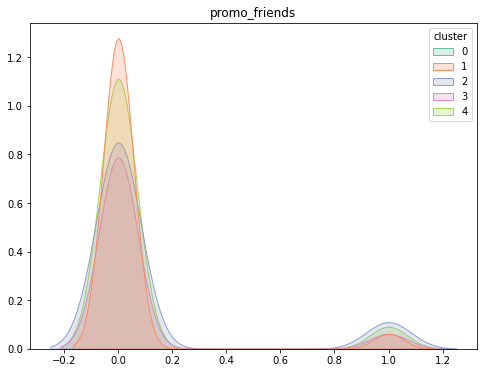

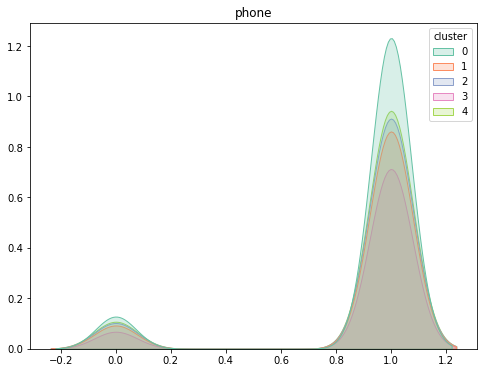

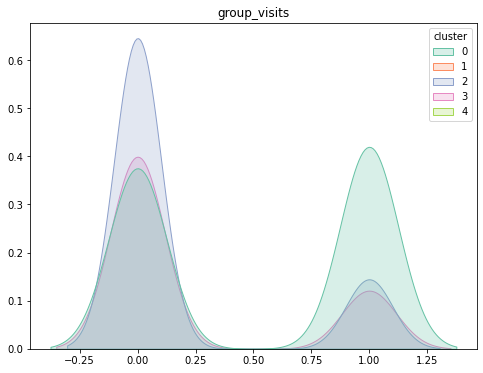

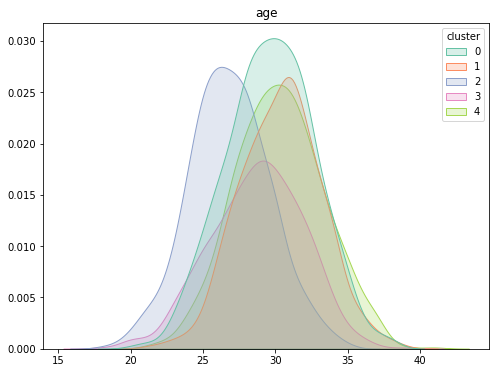

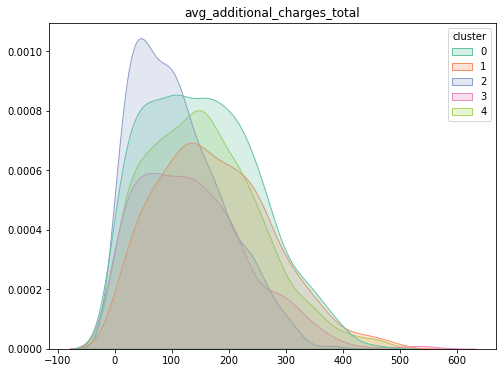

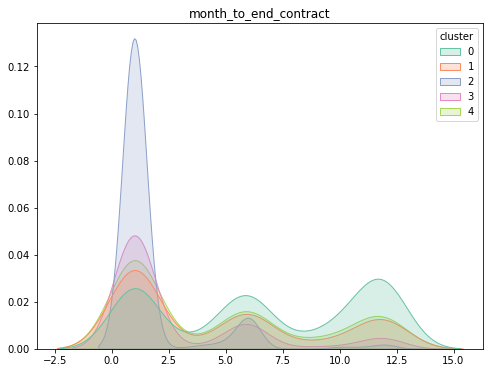

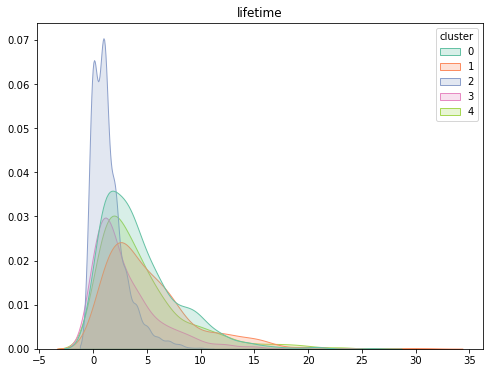

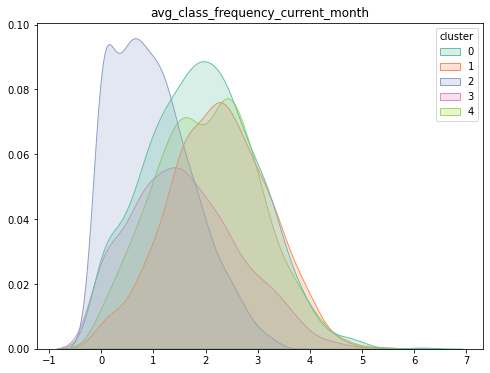

In [69]:
for parameter in df.drop(['churn', 'cluster'], axis=1):
    plt.figure(figsize=(8,6))
    sns.kdeplot(data=df, x=parameter, hue="cluster", palette='Set2', fill=True, warn_singular=False)
    plt.ylabel('')
    plt.xlabel('')
    plt.title(parameter)
    plt.show()

Графики распределения подтверждают, что в 3-м кластере:
- меньше всего клиентов, посещающих групповые занятия;
- наименьшие дополнительные траты;
- возраст ниже, чем в других кластерах;
- наименьший срок пользования услугами фитнес-центра;
- наименьшее число посещений за последний месяц.

## Выводы

Сеть фитнес-центров поставила перед собой целью снизить количество клиентов, которые прекращают пользоваться ее услугами. Для этого с помощью методов машинного обучения мы определили наиболее вероятные параметры, при которых клиент с большой вероятностью уйдет в отток (churn). Кроме того, мы кластеризировали клиентов, что позволит применить к ним разные маркетинговые подходы.

Для исследования были предоставлены данные о 4 тысячах клиентов за месяц.

Основные выводы:
- По общим данным за месяц видно, что в отток ушли 26,5% клиентов.
- Среди тех, кто ушел в отток, меньше клиентов, для которых клуб находится недалеко от дома или работы; меньше клиентов от компаний-партнеров; меньше промо-клиентов; контракт заключен на меньший срок; меньше посещений групповых занятий; средний возраст немного ниже; меньше побочных трат; меньший срок пользования услугами фитнес-центра; меньше посещений.
- Признаки, которые влияют на отток больше всего: время с момента первого обращения в фитнес-центр; остаток времени в месяцах до конца абонемента; средняя частота посещений в неделю за последний месяц; возраст.

После кластеризации клиентов, стало понятно, что в кластере, где доля оттока наиболее высокая (74%):
- средний возраст немного ниже, чем в других кластерах (27 лет);
- наименьшая доля клиентов от компаний-партнеров (23%);
- наименьший остаток срока действия абонемента (1,7 мес);
- меньше в среднем побочных трат (111 единиц);
- меньший срок пользования услугами фитнес-центра (1,4 месяца);
- наименьшее число посещений в среднем (1 занятия в неделю).

В кластере с наименьшим оттоком (4,6%):
- нет клиентов, посещающих групповые занятия;
- средний возраст самый высокий, хотя различия с другими кластерами не велико (30 лет);
- самое высокое значение побочных трат в среднем (174 единицы);
- наибольший срок пользования услугами фитнес-центра (более 5 месяцев;
- наибольшее число посещений в среднем (2,2 раза в неделю).

## Рекомендации

Для снижения доли оттока клиентов следует предлагать скидку на продление абонемента, если предыдущий заключен на небольшой срок и уже подходит к концу, а также применять другие маркетинговые акции.